In [6]:
import numpy as np
import pandas as pd
import io

In [5]:
import io

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_d77c4db6ce1d438e92a1f00e7f2d5d2d = 'https://s3-api.us-geo.objectstorage.softlayer.net'
else:
    endpoint_d77c4db6ce1d438e92a1f00e7f2d5d2d = 'https://s3-api.us-geo.objectstorage.service.networklayer.com'

client_d77c4db6ce1d438e92a1f00e7f2d5d2d = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Slaf1XqCb06Ac7c1BerRqK-u2sxdw1VOyoQwSFFj21gs',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_d77c4db6ce1d438e92a1f00e7f2d5d2d)

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
streaming_body_1 = client_d77c4db6ce1d438e92a1f00e7f2d5d2d.get_object(Bucket='learningpython-donotdelete-pr-8ligfz2xl65lxy', Key='smsspamcollection-1k.tsv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(streaming_body_1, "__iter__"): streaming_body_1.__iter__ = types.MethodType( __iter__, streaming_body_1 ) 


In [7]:
spam_df = pd.read_table(io.BytesIO(streaming_body_1.read()))

In [8]:
spam_df.head(20)

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
6,ham,Even my brother is not like to speak with me. ...,77,2
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,6
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2


In [10]:
spam_df.isnull().sum()  #check for missing data

label      0
message    0
length     0
punct      0
dtype: int64

In [11]:
len(spam_df)  #how many rows

1000

In [12]:
spam_df['label'].unique()   #review the label column values

array(['ham', 'spam'], dtype=object)

In [13]:
spam_df['label'].value_counts()  #count the values of label column

ham     848
spam    152
Name: label, dtype: int64

In [14]:
#visualize the data

In [15]:
spam_df['length'].describe()

count    1000.000000
mean       83.015000
std        55.066733
min         3.000000
25%        37.000000
50%        67.000000
75%       131.000000
max       384.000000
Name: length, dtype: float64

In [16]:
#mean is 83 and max is 384, let's plot log


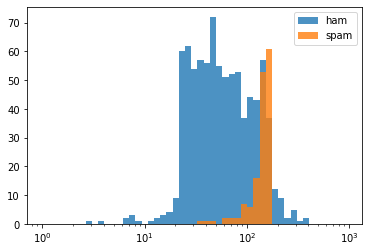

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(spam_df[spam_df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(spam_df[spam_df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

It looks like there's a small range of values where a message is more likely to be spam than ham.

Now let's look at the punct column:

In [18]:
spam_df['punct'].describe()

count    1000.000000
mean        4.001000
std         3.532631
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        30.000000
Name: punct, dtype: float64

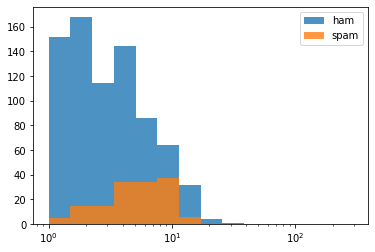

In [19]:
plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(spam_df[spam_df['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(spam_df[spam_df['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

This looks even worse - there seem to be no values where one would pick spam over ham. We'll still try to build a machine learning classification model, but we should expect poor results.

Split the data into train & test sets:
If we wanted to divide the DataFrame into two smaller sets, we could use

train, test = train_test_split(df)

For our purposes let's also set up our Features (X) and Labels (y). The Label is simple - we're trying to predict the label column in our data. For Features we'll use the length and punct columns. By convention, X is capitalized and y is lowercase.

Selecting features
There are two ways to build a feature set from the columns we want. If the number of features is small, then we can pass those in directly:

X = df[['length','punct']]

If the number of features is large, then it may be easier to drop the Label and any other unwanted columns:

X = df.drop(['label','message'], axis=1)

These operations make copies of df, but do not change the original DataFrame in place. All the original data is preserved.

In [20]:
# Create Feature and Label sets
X = spam_df[['length','punct']]  # note the double set of brackets
y = spam_df['label']

The default test size for train_test_split is 30%. Here we'll assign 33% of the data for testing.
Also, we can set a random_state seed value to ensure that everyone uses the same "random" training & testing sets.

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print('Training Data Shape:', X_train.shape)
print('Testing Data Shape: ', X_test.shape)

Training Data Shape: (670, 2)
Testing Data Shape:  (330, 2)


Train a Logistic Regression classifier¶
One of the simplest multi-class classification tools is logistic regression. Scikit-learn offers a variety of algorithmic solvers; we'll use L-BFGS.

In [22]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver='lbfgs')

lr_model.fit(X_train, y_train)

LogisticRegression()

Test the Accuracy of the Model

In [23]:
from sklearn import metrics

# Create a prediction set:
predictions = lr_model.predict(X_test)

# Print a confusion matrix
print(metrics.confusion_matrix(y_test,predictions))

[[273  12]
 [ 44   1]]


In [24]:
# You can make the confusion matrix less confusing by adding labels:
df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])
df

,ham,spam
ham,273,12
spam,44,1


These results are terrible! More spam messages were confused as ham (44) than correctly identified as spam (1), although a relatively small number of ham messages (12) were confused as spam.

In [25]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.86      0.96      0.91       285
        spam       0.08      0.02      0.03        45

    accuracy                           0.83       330
   macro avg       0.47      0.49      0.47       330
weighted avg       0.75      0.83      0.79       330



In [27]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.8303030303030303


Train a naïve Bayes classifier:
One of the most common - and successful - classifiers is naïve Bayes.

In [28]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

nb_model.fit(X_train, y_train)

MultinomialNB()

In [29]:
#run predictions on metrics

predictions = nb_model.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))

[[285   0]
 [ 45   0]]


In [30]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.86      1.00      0.93       285
        spam       0.00      0.00      0.00        45

    accuracy                           0.86       330
   macro avg       0.43      0.50      0.46       330
weighted avg       0.75      0.86      0.80       330



/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
print(metrics.accuracy_score(y_test,predictions))

0.8636363636363636


Train a support vector machine (SVM) classifier
Among the SVM options available, we'll use C-Support Vector Classification (SVC)

In [32]:
from sklearn.svm import SVC
svc_model = SVC(gamma='auto')
svc_model.fit(X_train,y_train)

SVC(gamma='auto')

In [33]:
#run predictions, reports on metrics

predictions = svc_model.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))

[[272  13]
 [ 30  15]]


In [34]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.90      0.95      0.93       285
        spam       0.54      0.33      0.41        45

    accuracy                           0.87       330
   macro avg       0.72      0.64      0.67       330
weighted avg       0.85      0.87      0.86       330



In [35]:
print(metrics.accuracy_score(y_test,predictions))

0.8696969696969697
